# STUDENT ATTENDANCE DASHBOARD FOR DECISION MAKING
You will be given a Google Sheet with different sheets holding data of different classes. Create a dashboard showing a summary of what's happening across different classes. Which students need attention for missing sessions? Which students are unsatisfied Which students are very satisfied? Column shows attendance. R- Column shows the rating by the candidate. Extra marks for identifying more useful insights. Missing values of the Type column can be treated as STUDENT. This data gets updated on a daily basis. The latest data gets injected in early columns. Your code shouldn't need any changes to deal with the latest data.

Data Link - https://docs.google.com/spreadsheets/d/1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2MJzpFA6t0AsBMi8/edit?usp=sharing

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns = 25

In [14]:
sheet_1_url = f"https://docs.google.com/spreadsheets/d/{'1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2MJzpFA6t0AsBMi8'}/export?format=csv"
sheet_2_url = f"https://docs.google.com/spreadsheets/d/{'1zz8dedYx-9wVX64rNDuG7VZFx-aLeu7lDlL0BcjF5sw'}/export?format=csv"

class_1 = pd.read_csv(sheet_1_url)
class_2 = pd.read_csv(sheet_2_url)

In [15]:
class_1.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,06-01-21,R-6-01-21,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21
0,1,WORKING,Missed,6,Missed,9,Missed,10,Missed,8,Missed,5,Missed,8,Missed,5,Missed,5,Missed,7,Missed,10
1,2,NaN,Missed,6,Missed,8,Missed,10,Attended,7,Missed,7,Attended,9,Attended,9,Missed,8,Attended,5,Missed,8
2,3,STUDENT,Missed,5,Missed,8,Missed,6,Missed,9,Attended,5,Attended,10,Missed,10,Missed,5,Attended,8,Attended,9
3,4,STUDENT,Missed,8,Missed,5,Attended,7,Missed,7,Missed,6,Missed,7,Attended,6,Attended,5,Attended,10,Attended,5
4,5,WORKING,Missed,7,Missed,6,Missed,8,Missed,6,Missed,10,Missed,9,Missed,10,Missed,8,Missed,10,Missed,8


In [16]:
class_2.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,06-01-21,R-6-01-21,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,01-01-21,R-01-01-21
0,1,NaN,Attended,6,Attended,7,Attended,9,Attended,7,Attended,7,Attended,6,Attended,7,Missed,5,NaN,NaN
1,2,NaN,Attended,7,Attended,5,Attended,10,Attended,9,Attended,5,Attended,7,Attended,9,Attended,8,NaN,NaN
2,3,STUDENT,Missed,8,Missed,6,Missed,7,Missed,5,Missed,7,Missed,8,Missed,8,Missed,10,NaN,NaN
3,4,NaN,Attended,10,Attended,7,Attended,6,Attended,7,Missed,9,Missed,8,Attended,9,Attended,6,NaN,NaN
4,5,WORKING,Attended,8,Attended,5,Attended,7,Missed,5,Missed,7,Missed,8,Missed,10,Missed,9,NaN,NaN


In [17]:
class_1.info()
print('\n\n')
class_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Student Roll Num  57 non-null     int64 
 1   Type              32 non-null     object
 2   10-01-21          57 non-null     object
 3   R-10-01-21        57 non-null     int64 
 4   09-01-21          57 non-null     object
 5   R-9-01-21         57 non-null     int64 
 6   08-01-21          57 non-null     object
 7   R-8-01-21         57 non-null     int64 
 8   07-01-21          56 non-null     object
 9   R-7-01-21         57 non-null     int64 
 10  06-01-21          56 non-null     object
 11  R-6-01-21         57 non-null     int64 
 12  05-01-21          56 non-null     object
 13  R-5-01-21         57 non-null     int64 
 14  04-01-21          56 non-null     object
 15  R-4-01-21         57 non-null     int64 
 16  03-01-21          56 non-null     object
 17  R-3-01-21         

# DATA PREPROCESSING

In [18]:
# Dropping two columns as they don't contain any data in them
class_2.drop(['01-01-21','R-01-01-21'],axis = 1,inplace = True)

In [19]:
# Filling Null values
class_1['Type'].fillna('STUDENT',inplace = True)
class_2['Type'].fillna('STUDENT',inplace = True)

class_1.dropna(inplace = True)
class_2.dropna(inplace = True)

class_1.reset_index(inplace = True,drop = True)
class_2.reset_index(inplace = True,drop = True)

In [20]:
# let's check for null values one last time
print(class_1.isna().sum().sum())
print(class_2.isna().sum().sum())

0
0


# STATISTICAL ANALYSIS

In [21]:
class_1.describe()

,Student Roll Num,R-10-01-21,R-9-01-21,R-8-01-21,R-7-01-21,R-6-01-21,R-5-01-21,R-4-01-21,R-3-01-21,R-02-01-21,R-01-01-21
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,29.178571,7.160714,7.571429,7.607143,7.375000,7.517857,7.482143,7.714286,7.303571,7.839286,7.732143
std,16.693066,1.745402,1.735796,1.669824,1.601846,1.737198,1.726700,1.836145,1.757267,1.895226,1.783674
min,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,14.750000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
50%,29.500000,7.000000,8.000000,8.000000,7.500000,7.000000,7.500000,8.000000,7.000000,8.000000,8.000000
75%,43.250000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000,9.000000
max,57.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [22]:
class_2.describe()

,Student Roll Num,R-10-01-21,R-9-01-21,R-8-01-21,R-7-01-21,R-6-01-21,R-5-01-21,R-4-01-21,R-3-01-21
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,35.582090,7.522388,7.119403,7.432836,7.208955,7.253731,7.686567,7.298507,7.746269
std,20.590634,1.708785,1.736615,1.819290,1.796776,1.654592,1.578347,1.723412,1.769637
min,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,18.500000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
50%,35.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,7.000000,8.000000
75%,53.500000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,70.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# VISUALIZATION

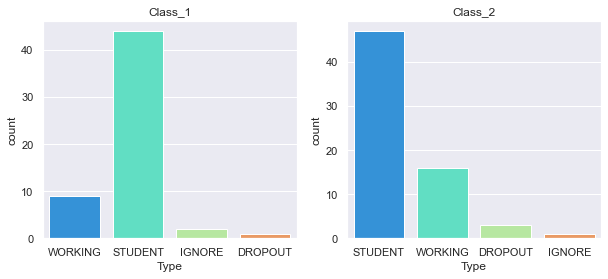

In [23]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.countplot(data = class_1, x = 'Type',palette='rainbow')
plt.title('Class_1')
plt.subplot(1,2,2)
sns.countplot(data = class_2, x = 'Type',palette='rainbow')
plt.title('Class_2')
plt.show()

Here majority of the people studying are students who are not working.

# CREATING NEW COLUMNS FOR BOTH CLASSES WHICH WILL CONTAIN THE MISSED SESSION COUNT AND AVERAGE RATING GIVEN BY EACH STUDENT

In [24]:
# for class_1
class_1.set_index('Student Roll Num',inplace = True)           # Setting roll number as index for calculation purpose
class_1['Avg_Rating'] = class_1.mean(axis = 1)                 # Calculating avg rating by each student
class_1['Missed_Count'] = (class_1=='Missed').sum(axis = 1)    # Calculating no. of missed sessions
class_1.reset_index(inplace = True)                            # Again retting index

# for class_2
class_2.set_index('Student Roll Num',inplace = True)           # Setting roll number as index for calculation purpose
class_2['Avg_Rating'] = class_2.mean(axis = 1)                 # Calculating avg rating by each student
class_2['Missed_Count'] = (class_2=='Missed').sum(axis = 1)    # Calculating no. of missed sessions
class_2.reset_index(inplace = True)                            # Again resetting index

In [25]:
class_1.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,06-01-21,R-6-01-21,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21,Avg_Rating,Missed_Count
0,1,WORKING,Missed,6,Missed,9,Missed,10,Missed,8,Missed,5,Missed,8,Missed,5,Missed,5,Missed,7,Missed,10,7.3,10
1,2,STUDENT,Missed,6,Missed,8,Missed,10,Attended,7,Missed,7,Attended,9,Attended,9,Missed,8,Attended,5,Missed,8,7.7,6
2,3,STUDENT,Missed,5,Missed,8,Missed,6,Missed,9,Attended,5,Attended,10,Missed,10,Missed,5,Attended,8,Attended,9,7.5,6
3,4,STUDENT,Missed,8,Missed,5,Attended,7,Missed,7,Missed,6,Missed,7,Attended,6,Attended,5,Attended,10,Attended,5,6.6,5
4,5,WORKING,Missed,7,Missed,6,Missed,8,Missed,6,Missed,10,Missed,9,Missed,10,Missed,8,Missed,10,Missed,8,8.2,10


In [26]:
class_2.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,06-01-21,R-6-01-21,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,Avg_Rating,Missed_Count
0,1,STUDENT,Attended,6,Attended,7,Attended,9,Attended,7,Attended,7,Attended,6,Attended,7,Missed,5,6.750,1
1,2,STUDENT,Attended,7,Attended,5,Attended,10,Attended,9,Attended,5,Attended,7,Attended,9,Attended,8,7.500,0
2,3,STUDENT,Missed,8,Missed,6,Missed,7,Missed,5,Missed,7,Missed,8,Missed,8,Missed,10,7.375,8
3,4,STUDENT,Attended,10,Attended,7,Attended,6,Attended,7,Missed,9,Missed,8,Attended,9,Attended,6,7.750,2
4,5,WORKING,Attended,8,Attended,5,Attended,7,Missed,5,Missed,7,Missed,8,Missed,10,Missed,9,7.375,5


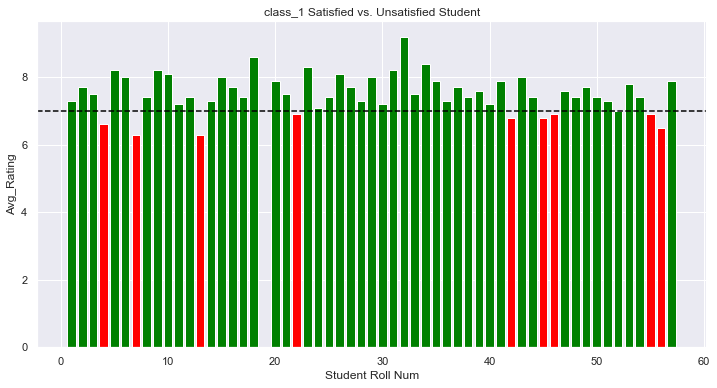

In [27]:
satisfaction_thresold = 7.0              # Thresold value
plt.figure(figsize = (12,6))
plt.bar(class_1['Student Roll Num'], class_1['Avg_Rating'], color=[('green' if rating >= satisfaction_thresold else 'red') for rating in class_1['Avg_Rating']])
plt.axhline(satisfaction_thresold, color="black", linestyle='--') # Adding a horizontal line at the threshold value
plt.title('class_1 Satisfied vs. Unsatisfied Student')
plt.xlabel('Student Roll Num')
plt.ylabel('Avg_Rating')
plt.show()

Text(0, 0.5, 'Rating')

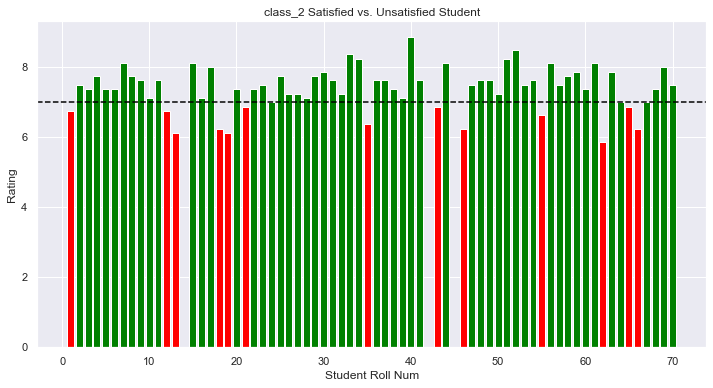

In [28]:
satisfaction_thresold = 7.0              # Thresold value

plt.figure(figsize = (12,6))
plt.bar(class_2['Student Roll Num'], class_2['Avg_Rating'], color=[('green' if rating >= satisfaction_thresold else 'red') for rating in class_2['Avg_Rating']])
plt.axhline(satisfaction_thresold, color="black", linestyle='--') # Adding a horizontal line at the threshold value
plt.title('class_2 Satisfied vs. Unsatisfied Student')
plt.xlabel('Student Roll Num')
plt.ylabel('Rating')

Here Students in green color are satisfied who has given average rating above 7.

And unsatisfied students are marked in red color.

# CREATING NEW DATAFRAMES WHICH CONTAINS DATA ONLY ABOUT THE STUDENTS WHO NEEDS ATTENTION

In [29]:
students_needing_attention1 = class_1[class_1['Missed_Count'] >= 7].sort_values(ascending = False,by = 'Missed_Count')

students_needing_attention2 = class_2[class_2['Missed_Count'] >= 7].sort_values(ascending = False,by = 'Missed_Count')

In [30]:
students_needing_attention1.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,06-01-21,R-6-01-21,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21,Avg_Rating,Missed_Count
0,1,WORKING,Missed,6,Missed,9,Missed,10,Missed,8,Missed,5,Missed,8,Missed,5,Missed,5,Missed,7,Missed,10,7.3,10
4,5,WORKING,Missed,7,Missed,6,Missed,8,Missed,6,Missed,10,Missed,9,Missed,10,Missed,8,Missed,10,Missed,8,8.2,10
50,52,DROPOUT,Missed,5,Missed,8,Missed,6,Missed,10,Missed,5,Missed,6,Missed,7,Missed,5,Missed,9,Missed,9,7.0,10
49,51,STUDENT,Missed,5,Missed,7,Missed,8,Missed,7,Missed,8,Missed,6,Missed,10,Missed,7,Missed,8,Missed,7,7.3,10
48,50,IGNORE,Missed,8,Missed,5,Missed,9,Missed,9,Missed,7,Missed,7,Missed,8,Missed,7,Missed,5,Missed,9,7.4,10


In [31]:
students_needing_attention2.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,06-01-21,R-6-01-21,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,Avg_Rating,Missed_Count
2,3,STUDENT,Missed,8,Missed,6,Missed,7,Missed,5,Missed,7,Missed,8,Missed,8,Missed,10,7.375,8
40,43,STUDENT,Missed,8,Missed,5,Missed,10,Missed,8,Missed,8,Missed,5,Missed,6,Missed,5,6.875,8
62,66,IGNORE,Missed,6,Missed,5,Missed,6,Missed,5,Missed,8,Missed,8,Missed,7,Missed,5,6.250,8
56,60,STUDENT,Missed,7,Missed,5,Missed,7,Missed,10,Missed,5,Missed,5,Missed,10,Missed,10,7.375,8
49,53,WORKING,Missed,5,Missed,6,Missed,7,Missed,6,Missed,10,Missed,9,Missed,9,Missed,8,7.500,8


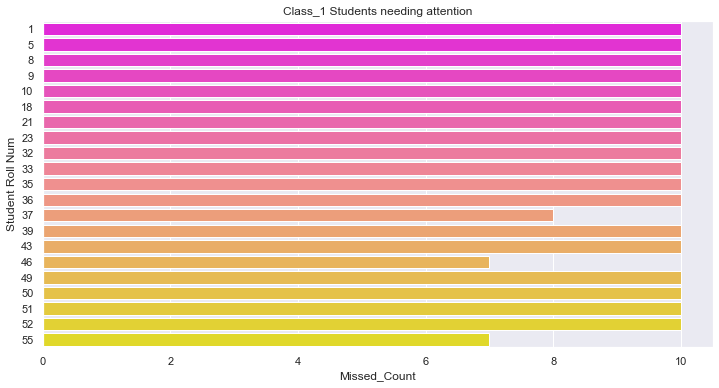

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(data = students_needing_attention1,x = 'Missed_Count',y = 'Student Roll Num',orient='h',palette='spring')
plt.title('Class_1 Students needing attention')
plt.show()

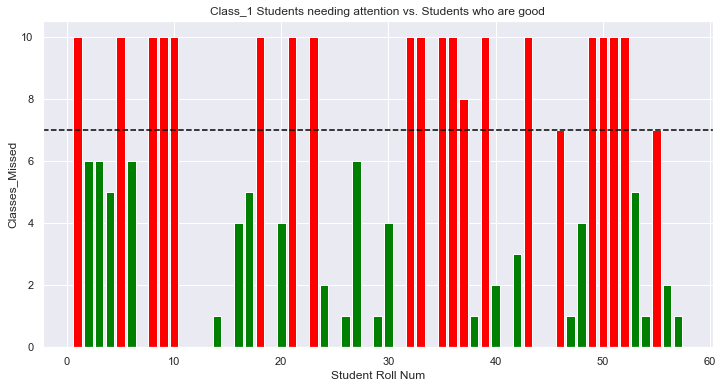

In [33]:
thresold = 7.0

plt.figure(figsize = (12,6))
plt.bar(class_1['Student Roll Num'], class_1['Missed_Count'], color=[('green' if rating < thresold else 'red') for rating in class_1['Missed_Count']])
plt.axhline(thresold, color="black", linestyle='--')
plt.title('Class_1 Students needing attention vs. Students who are good')
plt.xlabel('Student Roll Num')
plt.ylabel('Classes_Missed')
plt.show()

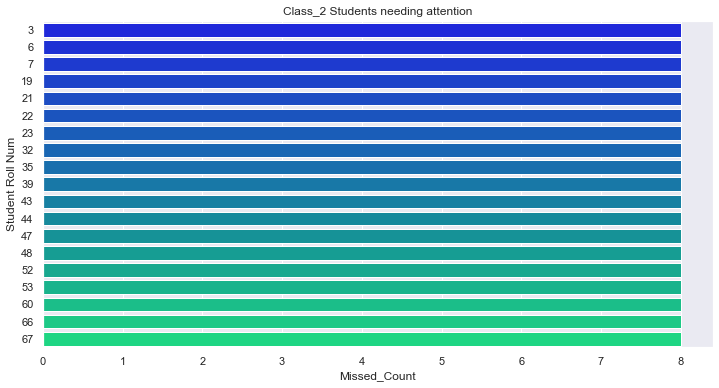

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(data = students_needing_attention2,x = 'Missed_Count',y = 'Student Roll Num',orient='h',palette='winter')
plt.title('Class_2 Students needing attention')
plt.show()

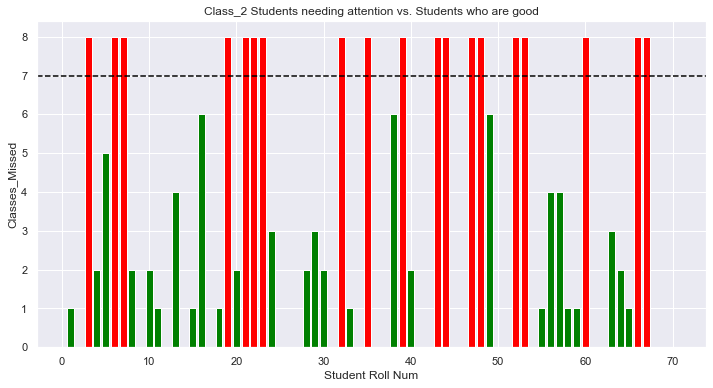

In [35]:
thresold = 7.0              # Thresold value

plt.figure(figsize = (12,6))
plt.bar(class_2['Student Roll Num'], class_2['Missed_Count'], color=[('green' if rating < thresold else 'red') for rating in class_2['Missed_Count']])
plt.axhline(thresold, color="black", linestyle='--')
plt.title('Class_2 Students needing attention vs. Students who are good')
plt.xlabel('Student Roll Num')
plt.ylabel('Classes_Missed')
plt.show()

# STUDENTS WHO HAS MISSED ATLEAST 7 SESSIONS ARE THE ONES WHO NEEDS ATTENTION.

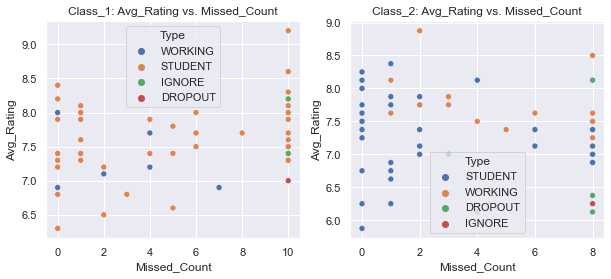

In [36]:
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.title('Class_1: Avg_Rating vs. Missed_Count')
sns.scatterplot(data = class_1,x= 'Missed_Count',y = 'Avg_Rating',hue = 'Type')

plt.subplot(1,2,2)
plt.title('Class_2: Avg_Rating vs. Missed_Count')
sns.scatterplot(data = class_2,x= 'Missed_Count',y = 'Avg_Rating',hue = 'Type')
plt.show()

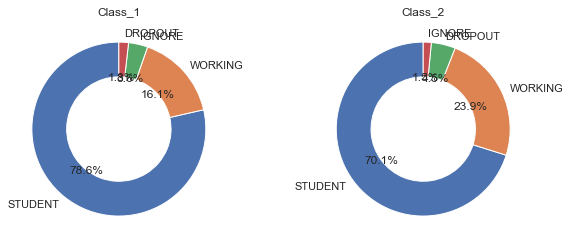

In [37]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
total = len(class_1)
type_counts = class_1["Type"].value_counts()
type_perc = type_counts / total * 100
plt.pie(type_perc, labels=type_perc.index, autopct="%1.1f%%", startangle=90, wedgeprops={"width":0.4})
plt.title("Class_1")

plt.subplot(1,2,2)
total = len(class_2)
type_counts = class_2["Type"].value_counts()
type_perc = type_counts / total * 100
plt.pie(type_perc, labels=type_perc.index, autopct="%1.1f%%", startangle=90, wedgeprops={"width":0.4})
plt.title("Class_2")
plt.show()

# Here atleast 70% people are students in both the classes.

# DISTRIBUTION OF NUMERIC DATA

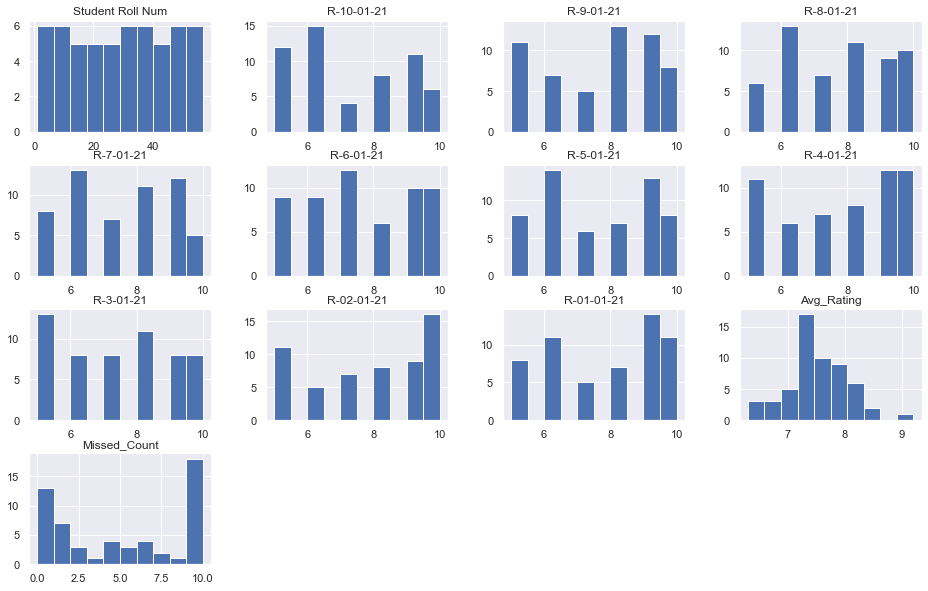

In [38]:
class_1.hist(bins = 10, figsize=(16,10))
plt.show()

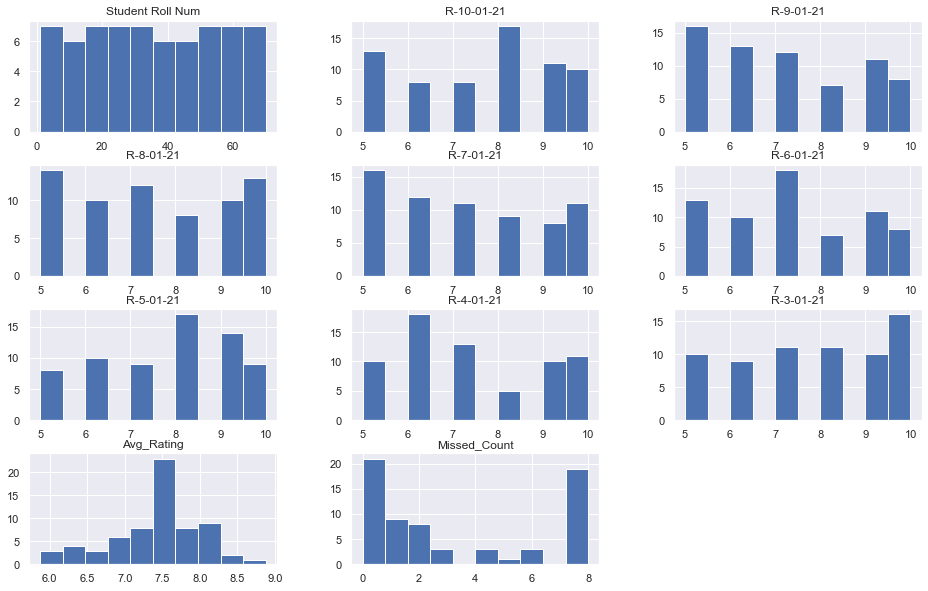

In [39]:
class_2.hist(bins = 10, figsize=(16,10))
plt.show()